In [113]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [114]:
c_df = pd.read_csv('./data/dataset_recommandation_culture_sahel.csv')
c_df

,pH,N,P,K,humidite,texture_du_sol,culture
0,5.63,48.71,24.58,63.87,23.32,sableux,mil
1,5.95,23.25,29.82,66.69,19.19,sableux,arachide
2,6.20,32.35,23.49,61.47,19.12,sablo-argileux,niebe
3,6.83,26.13,17.94,56.42,16.39,sableux,arachide
4,5.53,17.39,24.97,84.84,19.96,sableux,arachide
...,...,...,...,...,...,...,...
9995,7.02,34.49,34.16,66.83,18.18,limono-argileux,sorgho
9996,6.78,25.75,23.33,64.26,20.67,sablo-argileux,niebe
9997,6.14,43.37,16.72,64.36,19.97,sablo-argileux,niebe
9998,5.59,65.78,29.03,147.86,68.61,argileux,riz


In [115]:
print(c_df.columns)

Index(['pH', 'N', 'P', 'K', 'humidite', 'texture_du_sol', 'culture'], dtype='object')


In [116]:
# Vérifier les valeurs uniques dans la colonne 'Crop'
print(c_df['culture'].value_counts())


culture
sorgho      2081
riz         2031
niebe       2020
mil         1949
arachide    1919
Name: count, dtype: int64


In [117]:
from sklearn.preprocessing import LabelEncoder

# Créer l'encodeur
label_encoder = LabelEncoder()
soil_encoder = LabelEncoder()
soil_encoder.fit(c_df['texture_du_sol'])
# Appliquer l'encodage sur la colonne "culture"
c_df['culture_encoded'] = label_encoder.fit_transform(c_df['culture'])
c_df['soil_type_encoder'] = label_encoder.fit_transform(c_df['texture_du_sol'])

In [118]:
# Suppression des colonnes inutiles
df = c_df.drop(columns=['culture', 'texture_du_sol'])

# Séparer les features (X) et la cible (y)
x = c_df.drop(columns=['culture', 'culture_encoded', 'texture_du_sol'])  # caractéristiques du sol
y = c_df['culture_encoded']  # target encodée

# Mapping manuel des cultures (code -> nom)
culture_mapping = {
    0: 'Mil',
    1: 'Maïs',
    2: 'Sorgho',
    3: 'Niébé',
    4: 'Arachide'
}

# Mapping manuel des types de sol (code -> nom)
soil_mapping = {
    0: 'Argileux',
    1: 'Limoneux',
    2: 'Limono-argileux',
    3: 'Sableux',
    4: 'Sablo-argileux',
    5: 'Sablo-limoneux'
}

# Affichage des mappings pour les cultures
print("Mapping des cultures (code -> nom) :")
for code, culture in culture_mapping.items():
    print(f"{code} correspond à {culture}")

# Affichage des mappings pour les types de sol
print("\nMapping des types de sol (code -> nom) :")
for code, soil in soil_mapping.items():
    print(f"{code} correspond à {soil}")


Mapping des cultures (code -> nom) :
0 correspond à Mil
1 correspond à Maïs
2 correspond à Sorgho
3 correspond à Niébé
4 correspond à Arachide

Mapping des types de sol (code -> nom) :
0 correspond à Argileux
1 correspond à Limoneux
2 correspond à Limono-argileux
3 correspond à Sableux
4 correspond à Sablo-argileux
5 correspond à Sablo-limoneux


Corrélations avec 'culture_encoded' :
culture_encoded      1.000000
N                    0.583356
K                    0.464427
humidite             0.449683
P                    0.314178
pH                   0.081477
soil_type_encoder   -0.477491
Name: culture_encoded, dtype: float64


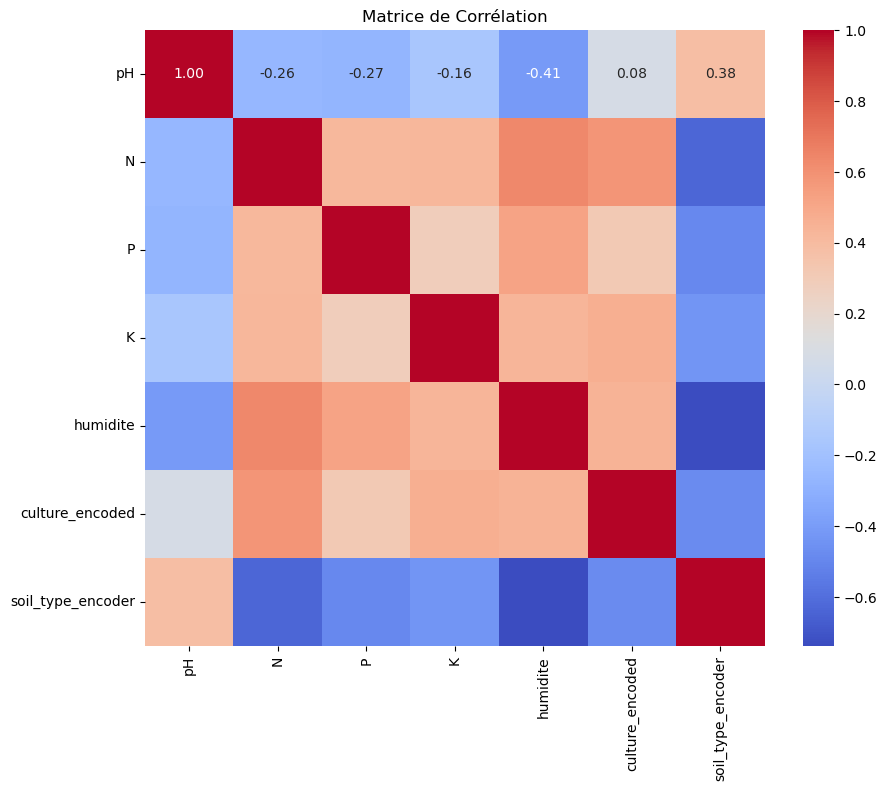

In [119]:
# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Afficher les corrélations avec 'Disease_encoded'
cor_crop = correlation_matrix['culture_encoded'].sort_values(ascending=False)

# Afficher les corrélations avec la colonne 'Disease_encoded'
print("Corrélations avec 'culture_encoded' :")
print(cor_crop)

# Afficher un heatmap de la matrice de corrélation pour une meilleure visualisation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de Corrélation")
plt.show()

In [120]:
y

0       1
1       0
2       2
3       0
4       0
       ..
9995    4
9996    2
9997    2
9998    3
9999    0
Name: culture_encoded, Length: 10000, dtype: int32

In [121]:
scaler = StandardScaler()

# Appliquer le scaler sur toutes les features
x = scaler.fit_transform(x)


In [122]:
x

array([[-1.24590431,  0.56870505, -0.04646554, -0.89065721, -0.21249526,
         0.08614569],
       [-0.65358523, -1.21507421,  0.54003823, -0.77359072, -0.5104504 ,
         0.08614569],
       [-0.19083595, -0.57750974, -0.16846728, -0.99028827, -0.51550048,
         0.77863514],
       ...,
       [-0.30189578,  0.19457381, -0.9262212 , -0.87031587, -0.454178  ,
         0.77863514],
       [-1.31994419,  1.76466388,  0.45161496,  2.59601458,  3.0549111 ,
        -1.99132267],
       [ 0.71615264, -0.96915648,  1.08624786, -1.07622005, -0.1850805 ,
         1.47112459]])

In [123]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Séparation des données en training et test AVANT d'appliquer SMOTE
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# Application de SMOTE sur les données d'entraînement uniquement
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Taille des classes AVANT SMOTE :", y_train.value_counts().to_dict())
print("Taille des classes APRÈS SMOTE :", dict(pd.Series(y_train_resampled).value_counts()))


Taille des classes AVANT SMOTE : {4: 1665, 3: 1625, 2: 1616, 1: 1559, 0: 1535}
Taille des classes APRÈS SMOTE : {1: 1665, 3: 1665, 0: 1665, 2: 1665, 4: 1665}


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Définir la grille des hyperparamètres à tester
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Instancier le modèle de base
rf = RandomForestClassifier(random_state=42)

# GridSearch avec validation croisée (5-fold)
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_weighted',
                           verbose=2,
                           n_jobs=-1)

# Entraîner le GridSearch sur les données
grid_search.fit(x_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :")
print(grid_search.best_params_)

# Meilleur score obtenu
print("Meilleur score F1 pondéré :")
print(grid_search.best_score_)


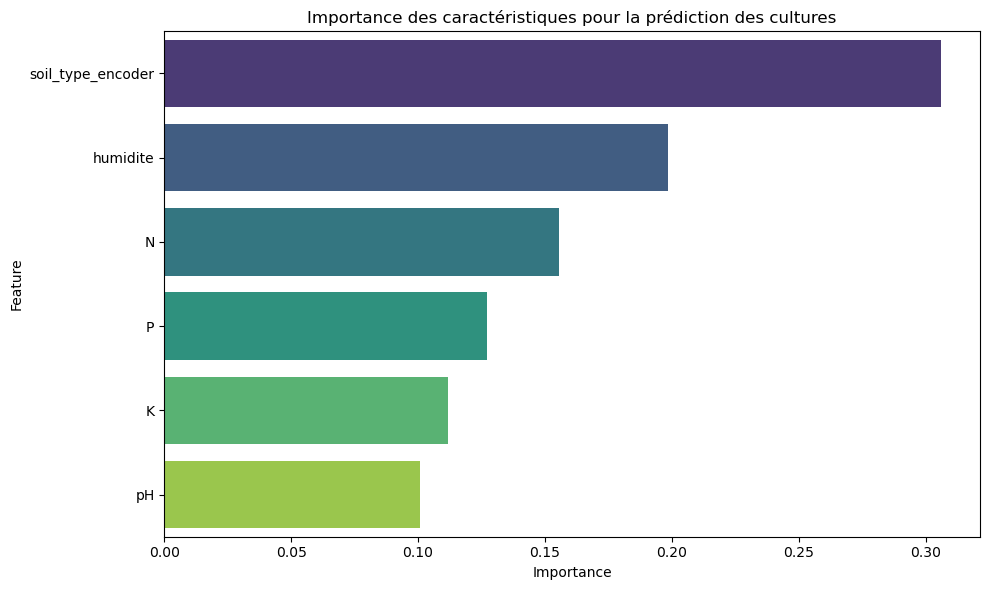

In [124]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Entraîner le modèle
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

# Récupérer les importances
importances = rf.feature_importances_

# Créer un DataFrame avec les noms des features
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(x_train.shape[1])]
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Trier par importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Importance des caractéristiques pour la prédiction des cultures')
plt.tight_layout()
plt.show()


In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Meilleurs hyperparamètres obtenus
best_params = {
    'bootstrap': False,
    'max_depth': 10,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 100
}

# Création du modèle RandomForest avec ces hyperparamètres
rf_model = RandomForestClassifier(**best_params)

# Entraîner le modèle sur les données d'entraînement
rf_model.fit(x_train, y_train)

# Prédictions sur les données de test
y_pred = rf_model.predict(x_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9015
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       384
           1       0.88      0.71      0.79       390
           2       0.75      1.00      0.86       404
           3       1.00      1.00      1.00       406
           4       1.00      0.91      0.95       416

    accuracy                           0.90      2000
   macro avg       0.91      0.90      0.90      2000
weighted avg       0.91      0.90      0.90      2000



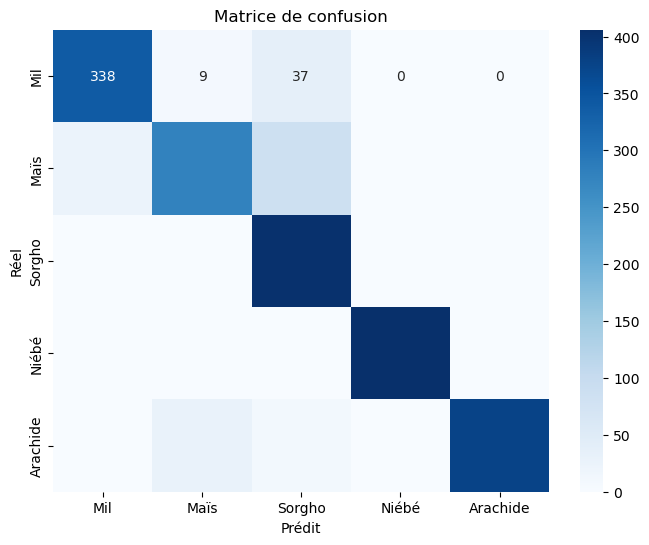

In [126]:

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Noms des classes (si tu veux les noms au lieu des chiffres, utilise ton mapping inversé ici)
class_names = [culture_mapping[i] for i in sorted(culture_mapping)]

# Affichage
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()


In [128]:
import pickle

# Supposons que ton modèle s'appelle 'rf_model'
with open('modele_recommandeur_cultures.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [129]:
# Charger le modèle depuis le fichier
with open('modele_recommandeur_cultures.pkl', 'rb') as f:
    modele_charge = pickle.load(f)


In [130]:
with open("scalerR.pkl", "wb") as f:
    pickle.dump(scaler, f)
with open("scalerR.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)